Importing all our necessary libraries and more...

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import re

Constants of exchange rates (constant in this test case anyway.)

In [31]:
cny_to_usd = 0.16
jpy_to_usd = 0.0091
krw_to_usd = 0.00093

First we clean up the data a lot, namely fixing issues around objects (removing commas from digits in the thousands.)
For some reason, each of these data sets is slightly different from the other in terms of data type, even though they were all from the same kaggle page.
That's ok, we will clean it up for the guy.
...and for us!

US data on movie theater ticket sales:

In [32]:
us = pd.read_csv('Thinkful/unit2_working_with_files/the film industry_US_08-17_English.csv')
us.infer_objects()

x = 0
#making a list with 5 entries at zero, to be added to. I'm sure there is a more elegant way
# I just counted 5 data points
str_change_usd = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

#making a new string, slicing out the comma, saving it to that string, then adding it to the 0 in each index of str_change_cny
for string in us['total gross(USD)']:
    string2 = string.replace(',', '') 
    print(string2)
    str_change_usd[x] = string2
    x+=1
    #I needed to add to a new column outside the for loop in 'avg_price_USD' because the data is not saved from this process
    
us['total_gross_USD'] = pd.Series(str_change_usd)
us['total_gross_USD'] = us['total_gross_USD'].astype('float64') / 1000000000

# us['avg_price'] = us['Avg. ticket price'].str.extract('(.\d?\.\d*)')
us['avg_price'] = us['Avg. ticket price'].str[1:].astype('float64')
#Read about regular expressions

# us.info()

print(us)

9750739371
10639505449
10481895548
10186927389
11027529757
10893180888
10272864049
11155547804
11259225977
10992920296
   year ticket sold(1000) total gross(USD) # of screens Avg. ticket price  \
0  2008      1,358,041.40    9,750,739,371      38, 834            $7.18    
1  2009      1,418,600.50   10,639,505,449       39,233            $7.50    
2  2010      1,328,503.60   10,481,895,548       39,520            $7.89    
3  2011      1,284,605.90   10,186,927,389       39,580            $7.93    
4  2012      1,385,367.70   11,027,529,757       39,662            $7.96    
5  2013      1,339,874.30   10,893,180,888       40,024            $8.13    
6  2014      1,257,388.10   10,272,864,049       39,956            $8.17    
7  2015      1,323,314.90   11,155,547,804       40,006            $8.43    
8  2016      1,301,644.20   11,259,225,977       40,174            $8.65    
9  2017      1,225,308.20   10,992,920,296       40,393            $8.97    

   # of new movies released  tota

China data on movie theater ticket sales:

In [33]:
china = pd.read_csv('Thinkful/unit2_working_with_files/the film industry_China_12-16_English.csv')
china.infer_objects()
#setting a counter in x
x = 0
#making a list with 5 entries at zero, to be added to. I'm sure there is a more elegant way
# I just counted 5 data points
str_change_cny = [0, 0, 0, 0, 0]

#making a new string, slicing out the comma, saving it to that string, then adding it to the 0 in each index of str_change_cny
for string in china['total gross(CNY)']:
    string2 = string.replace(',', '') 
    print(string2)
    str_change_cny[x] = string2
    x+=1
    #I needed to add to a new column outside the for loop in 'avg_price_USD' because the data is not saved from this process
    
china['total_gross_USD'] = pd.Series(str_change_cny)
china['total_gross_USD'] = (china['total_gross_USD'].astype('float64') * float(cny_to_usd)) / 1000000000 

china['avg_price_USD'] = china['Avg. ticket price'] * float(cny_to_usd)
# This worked here because the data is not an object! Because there is no comma!
# china['gross_USD'] = china['total gross(CNY)'] * float(cny_to_usd)

print(china)

16563400000
21474030000
29430420000
43880450000
45520440000
   year ticket sold(1000) total gross(CNY) # of screens  Avg. ticket price  \
0  2012        463,260.00   16,563,400,000       13,118                 36   
1  2013        614,240.00   21,474,030,000       18,195                 35   
2  2014        834,310.00   29,430,420,000       23,592                 35   
3  2015      1,260,890.00   43,880,450,000       31,627                 35   
4  2016      1,373,630.00   45,520,440,000       41,056                 33   

   # of new movies released  total_gross_USD  avg_price_USD  
0                       394         2.650144           5.76  
1                       345         3.435845           5.60  
2                       389         4.708867           5.60  
3                       522         7.020872           5.60  
4                       531         7.283270           5.28  


Japan data on movie theater ticket sales:

In [34]:
japan = pd.read_csv('Thinkful/unit2_working_with_files/the film industry_Japan_08-17_English.csv')
japan.infer_objects()
japan.info()

#setting a counter in x
x = 0
#making a list with 5 entries at zero, to be added to. I'm sure there is a more elegant way
# I just counted 5 data points
str_change_jpy = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

#making a new string, slicing out the comma, saving it to that string, then adding it to the 0 in each index of str_change_cny
for string in japan['total gross(JPY)']:
    string2 = string.replace(',', '') 
    str_change_jpy[x] = string2
    x+=1
    #I needed to add to a new column outside the for loop in 'avg_price_USD' because the data is not saved from this process
    
japan['total_gross_USD'] = pd.Series(str_change_jpy)
japan['total_gross_USD'] = (japan['total_gross_USD'].astype('float64') * float(jpy_to_usd)) / 1000000000

japan['avg_price_USD'] = round(japan['Avg. ticket price'] * float(jpy_to_usd), 2)
print(japan)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
year                        10 non-null int64
ticket sold(1000)           10 non-null object
total gross(JPY)            10 non-null object
# of screens                10 non-null object
Avg. ticket price           10 non-null int64
# of new movies released    10 non-null int64
dtypes: int64(3), object(3)
memory usage: 560.0+ bytes
   year ticket sold(1000) total gross(JPY) # of screens  Avg. ticket price  \
0  2008           160,491  194,836,000,000        3,359               1214   
1  2009           169,297  206,035,000,000        3,396               1217   
2  2010           174,358  220,737,000,000        3,412               1266   
3  2011           144,726  181,197,000,000        3,339               1252   
4  2012           155,159  195,190,000,000        3,290               1258   
5  2013           155,888  194,237,000,000        3,318               1246   
6  2014           1

Korea data on movie theater ticket sales:

In [35]:
korea = pd.read_csv('Thinkful/unit2_working_with_files/the film industry_SouthKorea_08-17_English.csv')
korea.infer_objects()
korea.info()

#setting a counter in x
x = 0
#making a list with 5 entries at zero, to be added to. I'm sure there is a more elegant way
# I just counted 5 data points
str_change_krw = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

#making a new string, slicing out the comma, saving it to that string, then adding it to the 0 in each index of str_change_cny
for string in korea['total gross(KRW)']:
    string2 = string.replace(',', '') 
    str_change_krw[x] = string2
    x+=1
    #I needed to add to a new column outside the for loop in 'avg_price_USD' because the data is not saved from this process
    
korea['total_gross_USD'] = pd.Series(str_change_krw)
korea['total_gross_USD'] = (korea['total_gross_USD'].astype('float64') * float(krw_to_usd)) / 1000000000


#setting a counter in x
x = 0
#making a list with 10 entries at zero, to be added to. I'm sure there is a more elegant way
# I just counted 10 data points in 'Avg. ticket price'
str_change = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

#making a new string, slicing out the comma, saving it to that string, then adding it to the 0 in each index of str_change
for string in korea['Avg. ticket price']:
    string2 = string[:1] + string[2:] 
    print(string2)
    str_change[x] = string2
    x+=1
    #I needed to add to a new column outside the for loop in 'avg_price_USD' because the data is not saved from this process

#converting the list into a series so it can be added to the df    
korea['avg_price_USD'] = pd.Series(str_change)
#setting the type of data to float, then multiplying by an exchange rate constant, then rounding to 2 places
korea['avg_price_USD'] = round((korea['avg_price_USD'].astype('float64') * float(krw_to_usd)), 2)

print(korea)

#The following is a whole lot of code trying to figure out how to remove the comma from the "string" of a thousand+

# korea['avg_price'] = korea['Avg. ticket price'].str.extract('(\d\D\d*)')
#This shows me the first digit, then the anything BUT a digit (a comma, here) and then any number of digits after.
#I do not know how to remove the comma using this process of indicating parts of the string via re

# korea['avg_price_USD'] = korea['Avg. ticket price'].convert_objects(convert_numeric=True)
#This did not work

# korea['avg_price'] = korea['Avg. ticket price'].astype('float64')
#This didn't convert the string to a float

# korea['Avg. ticket price USD'] = korea['Avg. ticket price'] * float(krw_to_usd)
#This doesn't work because of the object issue! Once I removed the comma it worked, though!


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
year                        10 non-null int64
ticket sold(1000)           10 non-null object
total gross(KRW)            10 non-null object
# of screens                10 non-null object
Avg. ticket price           10 non-null object
# of new movies released    10 non-null object
dtypes: int64(1), object(5)
memory usage: 560.0+ bytes
6494
6970
7834
7737
7466
7271
7738
7895
8032
7989
   year ticket sold(1000)   total gross(KRW) # of screens Avg. ticket price  \
0  2008        147,428.60    961,453,297,251        2,004             6,494   
1  2009        155,398.70  1,083,196,004,950        2,055             6,970   
2  2010        147,759.20  1,157,254,738,250        2,003             7,834   
3  2011        159,724.50  1,235,799,464,200        1,974             7,737   
4  2012        194,890.60  1,455,140,354,435        2,081             7,466   
5  2013        213,351.00  1,551,351,98

Here we will see the comparison of the amount of new releases by country and year.

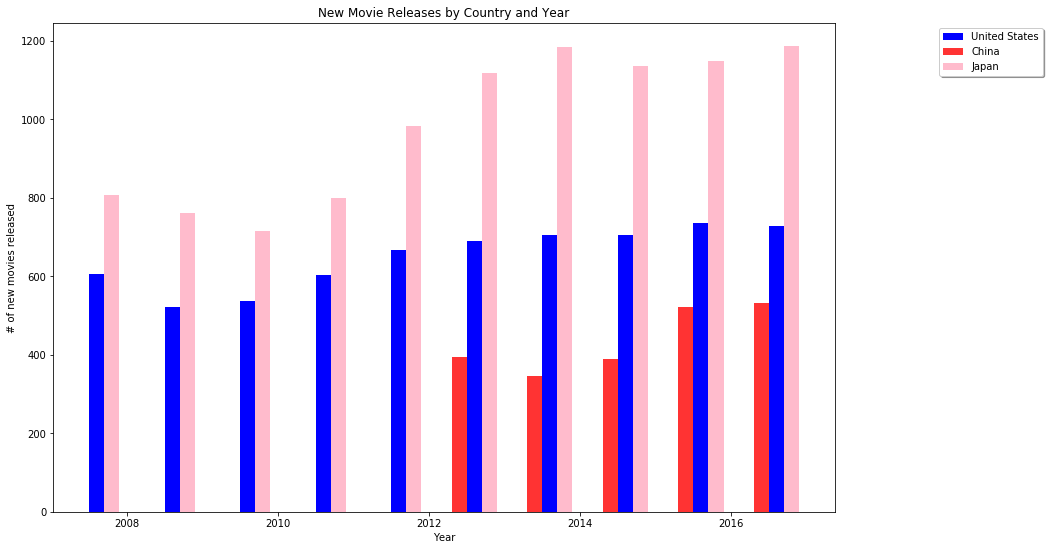

In [49]:
plt.figure(figsize=(14,9))

plt.bar(
    x=np.array(us['year'] - 0.4),
    height=np.array(us['# of new movies released']),
    color='blue',
    label='United States',
    width=0.2,
    alpha=1,
) 

plt.bar(
    x=np.array(china['year'] + 0.4),
    height=np.array(china['# of new movies released']),
    color='#ff3333',
    label='China',
    width=0.2,
    alpha=1
) 

plt.bar(
    x=japan['year'] - 0.2,
    height=japan['# of new movies released'],
    color='#ffbbcc',
    label='Japan',
    width=0.2,
    alpha=1
)

# plt.bar(
#     x=korea['year'] + 0.2,
#     height=korea['# of new movies released'],
#     color='#ffaa22',
#     label='Korea',
#     width=0.2,
#     alpha=1
#   )

plt.title('New Movie Releases by Country and Year')
plt.xlabel('Year')
plt.ylabel('# of new movies released')

plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1), shadow=True, ncol=1)

plt.show()

#I don't know why the korean numbers appear so low on the graph when I turn that plot on.
#They are razor thin and varying a little bit and the Y label values shrink down to the x axis also

The data above shows that Japan releases almost 200% the amount of movies compared to China or Korea,
and in more recent years about 150% the amount compared to the US. Why are there so many more new movies released in Japan?
(We don't have data from China until 2012.)

In [37]:
print('United States', us['# of new movies released'])
print('China', china['# of new movies released'])
print('Japan', japan['# of new movies released'])
print('Korea', korea['# of new movies released'])

United States 0    607
1    521
2    537
3    602
4    668
5    689
6    706
7    705
8    736
9    729
Name: # of new movies released, dtype: int64
China 0    394
1    345
2    389
3    522
4    531
Name: # of new movies released, dtype: int64
Japan 0     806
1     762
2     716
3     799
4     983
5    1117
6    1184
7    1136
8    1149
9    1187
Name: # of new movies released, dtype: int64
Korea 0      380
1      361
2      426
3      439
4      631
5      905
6    1,095
7    1,176
8      578
9      620
Name: # of new movies released, dtype: object


Line graph depicting average ticket price by year and country.

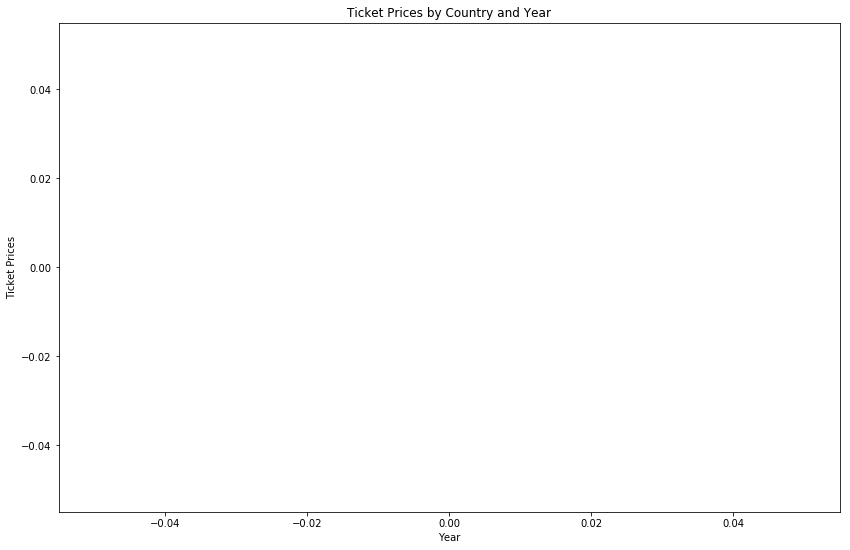

In [50]:
plt.figure(figsize=(14,9))
plt.plot(
    x=us['year'],
    y=us['avg_price'],
    c='blue',
#     marker='o',
#     s=150,
    alpha=.75
)

plt.plot(
    x=china['year'],
    y=china['avg_price_USD'],
    c='#ff3333',
#     marker='o',
#     s=150,
    alpha=.75
)

plt.plot(
    x=japan['year'],
    y=japan['avg_price_USD'],
    c='#ffbbcc',
#     marker='o',
#     s=150,
    alpha=.75
)

plt.plot(
    x=korea['year'],
    y=korea['avg_price_USD'],
    c='#ffaa22',
#     marker='o',
#     s=150,
    alpha=.75
)

plt.ylabel('Ticket Prices')
plt.xlabel('Year')
plt.title('Ticket Prices by Country and Year')

# plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1), shadow=True, ncol=1, labelspacing=1)


plt.show()

Normalized scatter graphs comparing ticket price.

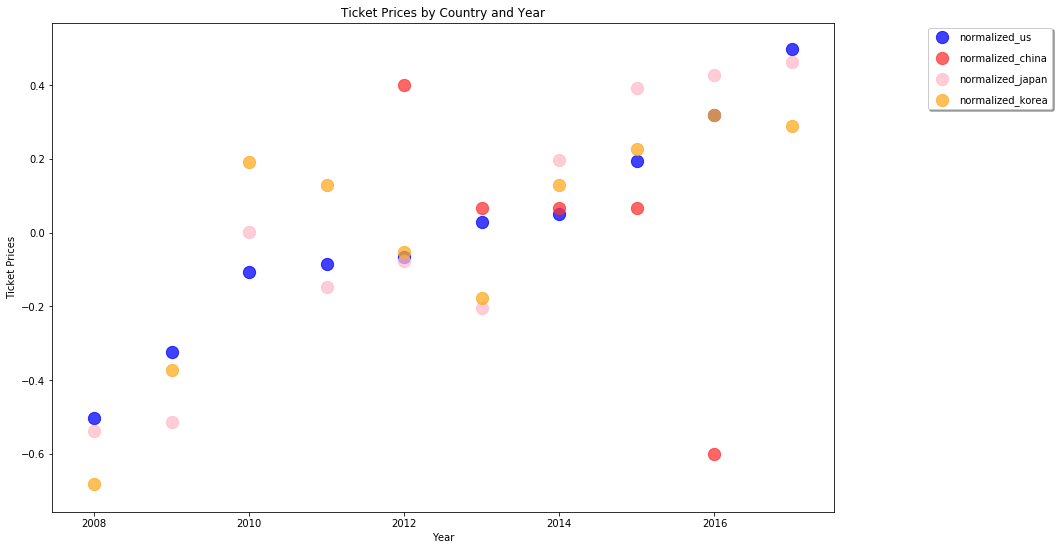

In [51]:
us['normalized_us'] = (us['avg_price'] - us['avg_price'].mean()) / (us['avg_price'].max() - us['avg_price'].min())
china['normalized_china'] = (china['avg_price_USD'] - china['avg_price_USD'].mean()) / (china['avg_price_USD'].max() - china['avg_price_USD'].min())
japan['normalized_japan'] = (japan['avg_price_USD'] - japan['avg_price_USD'].mean()) / (japan['avg_price_USD'].max() - japan['avg_price_USD'].min())
korea['normalized_korea'] = (korea['avg_price_USD'] - korea['avg_price_USD'].mean()) / (korea['avg_price_USD'].max() - korea['avg_price_USD'].min())

plt.figure(figsize=(14,9))

plt.scatter(
    x=us['year'],
    y=us['normalized_us'],
    c='blue',
    marker='o',
    s=150,
    alpha=.75
)

plt.scatter(
    x=china['year'],
    y=china['normalized_china'],
    c='#ff3333',
    marker='o',
    s=150,
    alpha=.75
)

plt.scatter(
    x=japan['year'],
    y=japan['normalized_japan'],
    c='#ffbbcc',
    marker='o',
    s=150,
    alpha=.75
)

plt.scatter(
    x=korea['year'],
    y=korea['normalized_korea'],
    c='#ffaa22',
    marker='o',
    s=150,
    alpha=.75
)

plt.ylabel('Ticket Prices')
plt.xlabel('Year')
plt.title('Ticket Prices by Country and Year')

plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1), shadow=True, ncol=1, labelspacing=1)



plt.show()

Here we see the ticket prices follow a similar pattern year by year, with the obvious exception of China's in 2016.

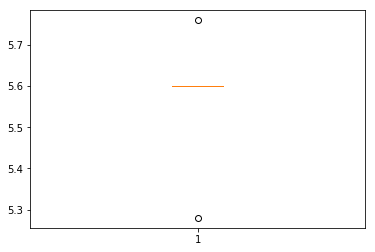

In [40]:
plt.boxplot(china['avg_price_USD'])
plt.show()

Here we can see total gross sales in USD for each country.

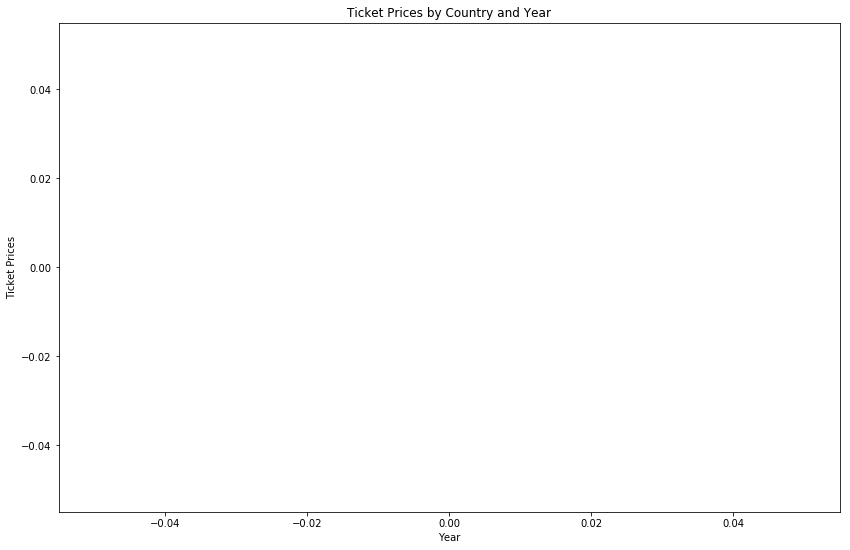

In [52]:
plt.figure(figsize=(14,9))

plt.plot(
    x=us['year'],
    y=us['total_gross_USD'],
    c='blue',
#     marker='o',
#     s=150,
    alpha=.75
)

plt.plot(
    x=china['year'],
    y=china['total_gross_USD'],
    c='#ff3333',
#     marker='o',
#     s=150,
    alpha=.75
)

plt.plot(
    x=japan['year'],
    y=japan['total_gross_USD'],
    c='#ffbbcc',
#     marker='o',
#     s=150,
    alpha=.75
)

plt.plot(
    x=korea['year'],
    y=korea['total_gross_USD'],
    c='#ffaa22',
#     marker='o',
#     s=150,
    alpha=.75
)

plt.ylabel('Ticket Prices')
plt.xlabel('Year')
plt.title('Ticket Prices by Country and Year')

# plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1), shadow=True, ncol=1, labelspacing=1)


plt.show()